In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
luna = pd.read_csv('./LUNA_GSR_Hasim_AVG.csv')

In [3]:
luna.head(10)

,-0.204907787
0,-0.190340
1,-0.174414
2,-0.184725
3,-0.309246
4,-0.308603
5,-0.195445
6,-0.417814
7,-0.416962
8,-0.179272
9,-0.458162


In [4]:
luna.isnull().sum().sum()

0

In [5]:
type(luna)

pandas.core.frame.DataFrame

In [6]:
luna.shape

(54989, 1)

In [7]:
luna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54989 entries, 0 to 54988
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   -0.204907787  54989 non-null  float64
dtypes: float64(1)
memory usage: 429.7 KB


In [8]:
luna['X'] = list(range(0,54989))
luna['Y'] = luna.iloc[:,[0]]

In [9]:
luna.drop('-0.204907787', axis=1)

,X,Y
0,0,-0.190340
1,1,-0.174414
2,2,-0.184725
3,3,-0.309246
4,4,-0.308603
...,...,...
54984,54984,-0.980373
54985,54985,-1.043195
54986,54986,-1.008909
54987,54987,-1.016563


In [10]:
x = luna['X']
y = luna['Y']

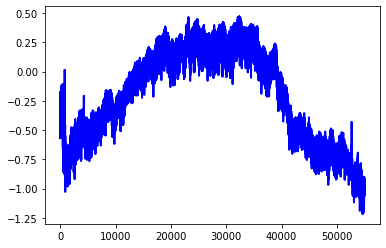

In [11]:
import matplotlib.pyplot as plt

plt.plot(x, y, linewidth=2, linestyle="-", c="b")
plt.show()

### scipy.signal.lfilter 

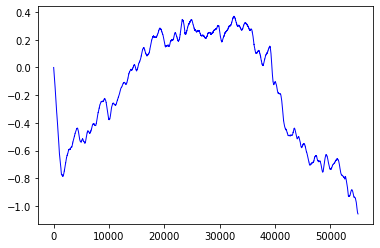

In [13]:

from scipy.signal import lfilter

n = 500  
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, y, axis=0)
plt.plot(x, yy, linewidth=1, linestyle="-", c="b")

## Savitzky-Golay filter

In [ ]:
##denedim ama sanırım (x = list(range(0,54989)) y = luna.iloc[:,[0]]) bunların boyutu aynı değil. sanırım x one-dimensional, y de two-dimensional.

In [ ]:
##dokumanda int ve odd olmalı dediği için bi de böyle deneyeyim dedim. 

In [ ]:
##luna[['-0.204907787']] = luna[['-0.204907787']].astype(int) (bu noktada yanlışlıkla her şeyi 0 yaptım :( )

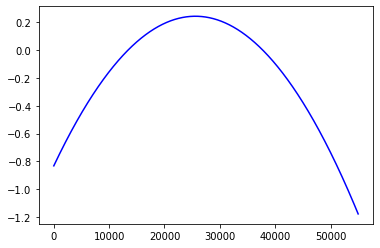

In [14]:
from scipy.signal import savgol_filter
w = savgol_filter(y, 54989, 2)
plt.plot(x, w, 'b')

In [ ]:
##aşırı basit oldu şimdi de...

## Kalman filter

In [ ]:
#pip install pykalman --user

In [15]:
%matplotlib inline
from pykalman import KalmanFilter
import numpy as np
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], 
 observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = x
kf = kf.em(measurements, n_iter=5)
filtered_state_estimates = kf.filter(measurements)[0]
(smoothed_state_estimates, smoothed_state_covariances)=kf.smooth(measurements)
pl.figure()
lines_true = pl.plot(measurements, color='b')
lines_filt = pl.plot(filtered_state_estimates, color='r')
lines_smooth = pl.plot(smoothed_state_estimates, color='g')
pl.show()

ValueError: could not broadcast input array from shape (2,2) into shape (2,1)